# Pytorch: Control Flow + Weight Sharing
https://pytorch.org/tutorials/beginner/examples_nn/dynamic_net.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



PyTorch: Control Flow + Weight Sharing
--------------------------------------

To showcase the power of PyTorch dynamic graphs, we will implement a very strange
model: a third-fifth order polynomial that on each forward pass
chooses a random number between 3 and 5 and uses that many orders, reusing
the same weights multiple times to compute the fourth and fifth order.



In [2]:
import math
import random
import torch

In [3]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [4]:
class DynamicNet(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))


    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp

        return y


    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'
    
    
# Construct our model by instantiating the class defined above
model = DynamicNet()

In [5]:
# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-8, momentum = 0.9)

In [6]:
for t in range(30000):
    
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)

    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 1712.6478271484375
3999 784.7074584960938
5999 385.6038513183594
7999 187.160400390625
9999 95.19692993164062
11999 51.595394134521484
13999 29.981407165527344
15999 20.450260162353516
17999 13.807415962219238
19999 11.236637115478516
21999 10.033169746398926
23999 9.835566520690918
25999 8.91910171508789
27999 8.971170425415039
29999 8.689823150634766
Result: y = -0.007816886529326439 + 0.854462206363678 x + 0.0008963686414062977 x^2 + -0.09323354810476303 x^3 + 8.737208554521203e-05 x^4 ? + 8.737208554521203e-05 x^5 ?


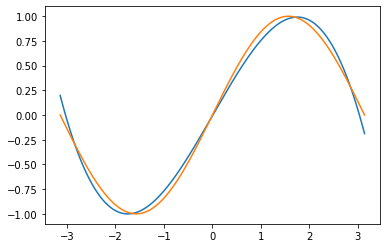

In [7]:
y1 = model.a.item() + \
     model.b.item() * x + \
     model.c.item() * x**2 + \
     model.d.item() * x**3 + \
     model.e.item() * (x**4 + x**5) / 2

plt.plot(x, y1); 
plt.plot(x, np.sin(x)); 